In [2]:
import numpy as np
from utils import load_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### The Idea is first to see how "complex" the data is. Given its complexity we can then choose a suitable classifier

In [3]:
path = 'test_images\\resources'
labels = ["yellow", "blue"]

In [4]:
# load data
images, y = load_data(path, ["yellow", "blue"])
num_labels = len(np.unique(y))
n = len(images)
d = 128 * 128 * 3

In [5]:
# fit pca
X = images.reshape(n,d)
pca = PCA(n_components=2)
lower_dim = pca.fit_transform(X)

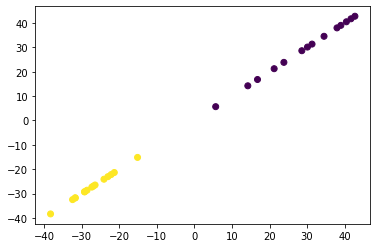

In [6]:
x_1 = lower_dim[:,0]
x_2 = lower_dim[:,0]
plt.scatter(x_1, x_2, c=y)
plt.show()

### As we can see, when using pca we can bring the data to two dimensions and it will still be linearly seperable. This indicates that the data has clear main components which will make it easy to classify it in higher dimensional space. Therefore we just use simple kmeans for classification

In [7]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [8]:
# training and prediction
kmeans_clf = KMeans(n_clusters=num_labels).fit(X_train)
y_pred = kmeans_clf.predict(X_test)
print(accuracy_score(y_pred, y_test))

1.0


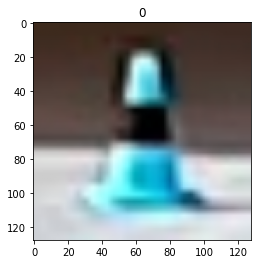

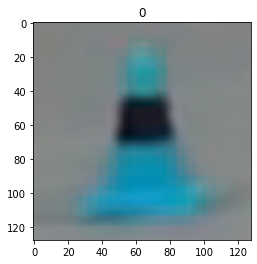

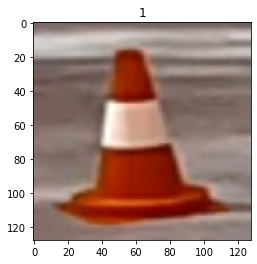

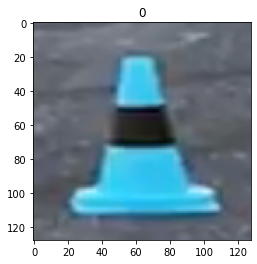

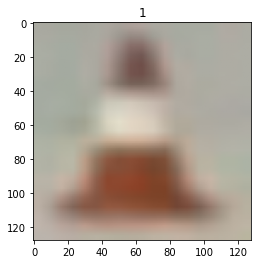

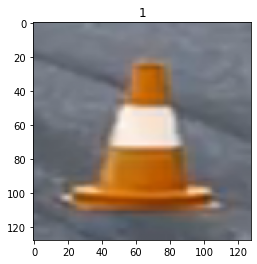

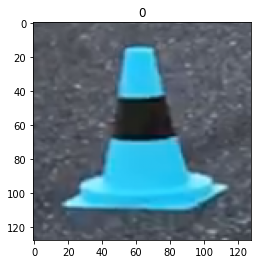

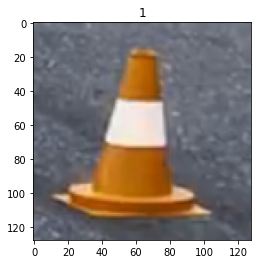

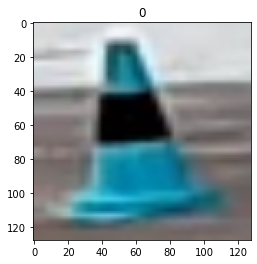

In [9]:
for i, img in enumerate(X_test):
    img = img.reshape((128, 128, 3))
    plt.imshow(img)
    plt.title(y_pred[i])
    plt.show()